# Exploration NYC Taxi

This <a href='https://www.kaggle.com/breemen/nyc-taxi-fare-data-exploration'>notebook</a> is recreated.  

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
plt.style.use('seaborn-whitegrid')

# Load Data from <a href='https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data'> new york city taxi fare prediction</a>

In [2]:
df_train =  pd.read_csv('train.csv', nrows = 11_000_000, parse_dates=["pickup_datetime"])

# list first few rows (datapoints)
df_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
# check datatypes
df_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [4]:
# check statistics of the features
df_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.100000e+07,1.100000e+07,1.100000e+07,1.099993e+07,1.099993e+07,1.100000e+07
mean,1.133840e+01,-7.250944e+01,3.991923e+01,-7.251049e+01,3.991914e+01,1.684816e+00
std,9.795435e+00,1.295399e+01,9.295288e+00,1.285160e+01,9.216153e+00,1.322076e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075264e+01,-7.398015e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [5]:
print('Old size: %d' % len(df_train))
df_train = df_train[df_train.fare_amount>=0]
print('New size: %d' % len(df_train))

Old size: 11000000
New size: 10999545


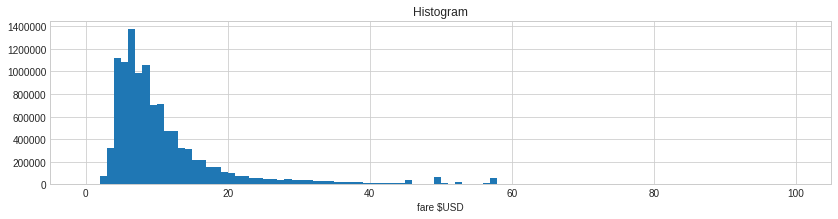

In [6]:
# plot histogram of fare
df_train[df_train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('fare $USD')
plt.title('Histogram');

In [7]:
print(df_train.isnull().sum())

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    71
dropoff_latitude     71
passenger_count       0
dtype: int64


In [8]:
print('Old size: %d' % len(df_train))
df_train = df_train.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(df_train))

Old size: 10999545
New size: 10999474


In [9]:
# this function will also be used with the test set below
def select_within_boundingbox(df, BB):
    return (df.pickup_longitude >= BB[0]) & (df.pickup_longitude <= BB[1]) & \
           (df.pickup_latitude >= BB[2]) & (df.pickup_latitude <= BB[3]) & \
           (df.dropoff_longitude >= BB[0]) & (df.dropoff_longitude <= BB[1]) & \
           (df.dropoff_latitude >= BB[2]) & (df.dropoff_latitude <= BB[3])
            
# load image of NYC map
BB = (-74.5, -72.8, 40.5, 41.8)
nyc_map = plt.imread('03_nyc_-74.5_-72.8_40.5_41.8.png')

# load extra image to zoom in on NYC
BB_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('03_nyc_-74.3_-73.7_40.5_40.9.png')

In [10]:
print('Old size: %d' % len(df_train))
df_train = df_train[select_within_boundingbox(df_train, BB)]
print('New size: %d' % len(df_train))

Old size: 10999474
New size: 10766112


In [11]:
df_resample = df_train.set_index('pickup_datetime').sort_index()['passenger_count'].resample('1H').sum()
df_resample.dtypes

dtype('int64')

In [12]:
df_resample.head()

pickup_datetime
2009-01-01 00:00:00+00:00    243
2009-01-01 01:00:00+00:00    266
2009-01-01 02:00:00+00:00    254
2009-01-01 03:00:00+00:00    217
2009-01-01 04:00:00+00:00    137
Freq: H, Name: passenger_count, dtype: int64

In [13]:
df_resample.tail()

pickup_datetime
2015-06-30 19:00:00+00:00    452
2015-06-30 20:00:00+00:00    378
2015-06-30 21:00:00+00:00    331
2015-06-30 22:00:00+00:00    437
2015-06-30 23:00:00+00:00    309
Freq: H, Name: passenger_count, dtype: int64

In [14]:
print('all time taxi_count =', len(df_resample), 'all time passenger_count =', df_resample.sum())

all time taxi_count = 56928 all time passenger_count = 18138317


In [15]:
start_time = '2014-07-01 00:00:00'
end_time = '2015-01-31 23:59:00'
mask = (df_resample.index > start_time) & (df_resample.index < end_time)
# df_resample[mask]
print('target time taxi_count', len(df_resample[mask]), 'target time passenger_count', df_resample[mask].sum())
df_resample[mask].sort_values(ascending=False)

target time taxi_count 5159 target time passenger_count 1515274


pickup_datetime
2014-10-23 20:00:00+00:00    671
2014-11-02 01:00:00+00:00    665
2014-10-18 23:00:00+00:00    660
2014-10-31 22:00:00+00:00    656
2014-11-22 22:00:00+00:00    641
2014-09-20 00:00:00+00:00    625
2014-09-08 18:00:00+00:00    622
2014-10-02 21:00:00+00:00    620
2014-09-21 00:00:00+00:00    616
2015-01-31 19:00:00+00:00    608
2014-10-10 20:00:00+00:00    599
2014-09-05 22:00:00+00:00    598
2014-11-07 19:00:00+00:00    597
2015-01-16 20:00:00+00:00    594
2014-07-26 23:00:00+00:00    594
2014-09-17 20:00:00+00:00    593
2014-12-05 22:00:00+00:00    592
2014-10-19 00:00:00+00:00    592
2014-11-08 23:00:00+00:00    590
2014-10-25 19:00:00+00:00    589
2014-10-18 00:00:00+00:00    588
2014-12-12 19:00:00+00:00    587
2014-09-27 19:00:00+00:00    587
2014-09-06 22:00:00+00:00    587
2014-11-22 19:00:00+00:00    585
2014-11-18 22:00:00+00:00    584
2014-10-17 22:00:00+00:00    584
2015-01-10 20:00:00+00:00    584
2014-09-11 22:00:00+00:00    583
2014-07-15 19:00:00+00:00  

In [16]:
# this function will be used more often to plot data on the NYC map
def plot_on_map(save_file, df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))

    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)
    plt.savefig(save_file, bbox_inches = 'tight', pad_inches = 0)

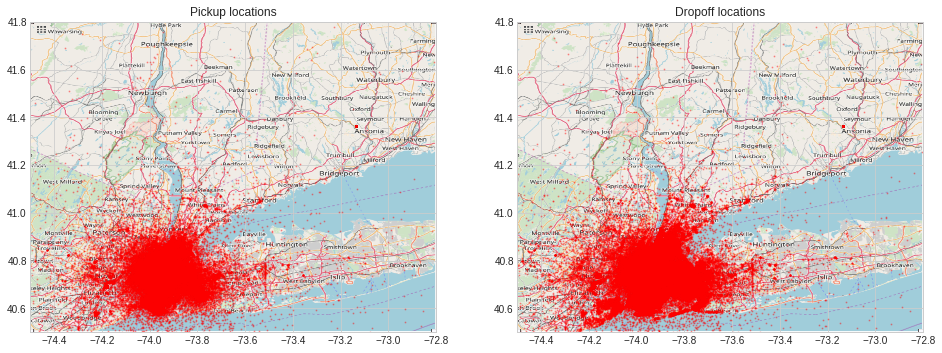

In [17]:
# plot training data on map
plot_on_map('03_NYC_Taxi_map.png', df_train, BB, nyc_map, s=1, alpha=0.3)

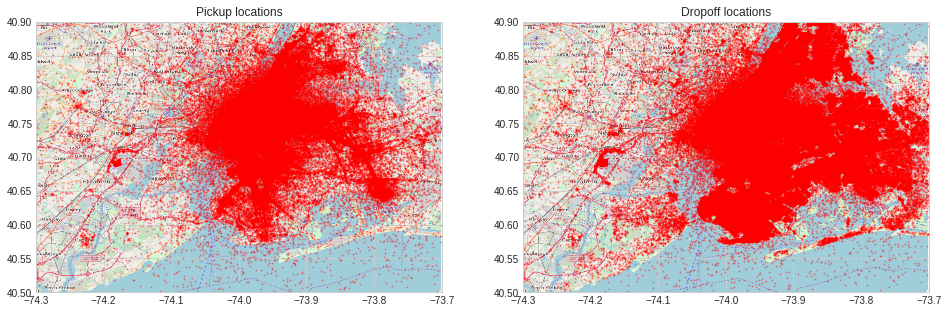

In [18]:
# plot training data on map zoomed in
plot_on_map('03_NYC_Taxi_zoom_map.png', df_train, BB_zoom, nyc_map_zoom, s=1, alpha=0.3)

In [19]:
from matrixprofile import *
from matrixprofile.discords import discords

In [20]:
df = pd.DataFrame({'value' : df_resample[mask]})
df.values.squeeze()

array([ 64,  79,  46, ..., 434, 535, 559])

In [21]:
m = 24
profile = matrixProfile.stomp(df.values.squeeze(), m)
profile

(array([1.10433852, 1.09731462, 1.10539187, ..., 1.32185729, 1.28896086,
        1.23434726]), array([3216., 3217., 3218., ..., 2781., 2782., 2783.]))

In [22]:
df['profile'] = np.append(profile[0], np.zeros(m-1) + np.nan)
df['profile_index'] = np.append(profile[1], np.zeros(m-1) + np.nan)
df.head()

,value,profile,profile_index
pickup_datetime,,,
2014-07-01 01:00:00+00:00,64,1.104339,3216.0
2014-07-01 02:00:00+00:00,79,1.097315,3217.0
2014-07-01 03:00:00+00:00,46,1.105392,3218.0
2014-07-01 04:00:00+00:00,45,1.090230,3219.0
2014-07-01 05:00:00+00:00,67,1.129637,3220.0


/home/ubuntu/Documents/04_Python_WorkSpace/Python-Study/99_Utility/venv/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


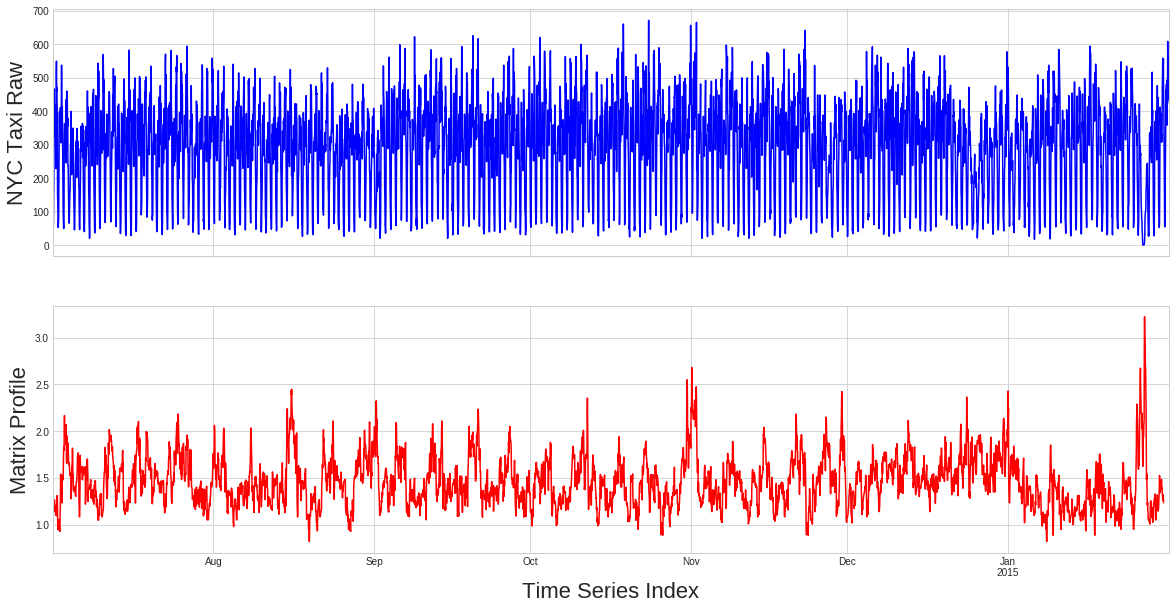

In [23]:
#Plot the signal data
fig, (ax1, ax2) = plt.subplots(2,1,sharex=True,figsize=(20,10))
df['value'].plot(ax=ax1, kind='line', c='b')
ax1.set_ylabel('NYC Taxi Raw', size=22)

#Plot the Matrix Profile
df['profile'].plot(ax=ax2, kind='line', c='r')
ax2.set_ylabel('Matrix Profile', size=22)
ax2.set_xlabel('Time Series Index', size=22)

plt.savefig('03_NYC_Taxi_MP.png', bbox_inches = 'tight', pad_inches = 0)
plt.show()

In [24]:
# exclude up to a day on the left and right side
ex_zone = 12

# we look for the 5 events specified in the data explaination
anoms = discords(df['profile'], ex_zone, k=15)
df.iloc[anoms].sort_values(by='profile', ascending=False)

,value,profile,profile_index
pickup_datetime,,,
2015-01-27 08:00:00+00:00,12,3.220831,2720.0
2014-11-01 03:00:00+00:00,400,2.680203,3167.0
2015-01-26 13:00:00+00:00,268,2.672849,3569.0
2014-10-31 06:00:00+00:00,168,2.548266,2285.0
2014-11-02 00:00:00+00:00,470,2.473499,2471.0
2014-08-16 02:00:00+00:00,207,2.447620,265.0
2015-01-01 01:00:00+00:00,507,2.428649,2806.0
2014-11-30 01:00:00+00:00,331,2.421940,1128.0
2014-12-24 02:00:00+00:00,90,2.363049,4201.0


# Compare [5 known anomalies] vs [Matrix Profile Result]

5 known anomalies of the number of taxi passengers from 2014-07-01 to 2015-01-31.  

* NYC Marathon - 2014-11-02
* Thanksgiving - 2014-11-27
* Christmas - 2014-12-25
* New Years - 2015-01-01
* Snow Blizzard - 2015-01-26 and 2015-01-27

# This Matrix Profile Result is better than 4 known anomalies. (Except Thanksgiving 2014-11-27)